# Using the GIS 

The `GIS` object in the `gis` module is the most important object when working with the ArcGIS API for Python. The GIS object represents the GIS you are working with, be it ArcGIS Online or an instance of ArcGIS Enterprise. You use the GIS object to consume and publish GIS content and administrators may use it to manage GIS users, groups and datastores. This object becomes your entry point in your Python script when using the API.

To use the GIS object, import GIS from the `arcgis.gis` module:

In [1]:
from arcgis.gis import GIS

To create the GIS object, we pass in the url and our login credentials as shown below:

In [2]:
gis = GIS('home')

If connecting to an ArcGIS Enterprise in your premises, your URL becomes `http://machinename.domain.com/webadapter`. Your GIS can support a [number of authentication schemes](http://server.arcgis.com/en/portal/latest/administer/windows/about-configuring-portal-authentication.htm), refer to [this section of the guide](https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/) to know how to **authenticate your scripts and notebooks** for various such schemes.

Below, we're connecting to ArcGIS Online (the default GIS used when the url is not provided) as an anonymous user:

In [3]:
gis = GIS()

Adding a '?' mark after an object and querying it brings up help for that object in the notebook:

In [4]:
gis?

The notebook provides intellisense and code-completion. Typing a dot after an object and hitting tab brings up a drop-down with its properties and methods:
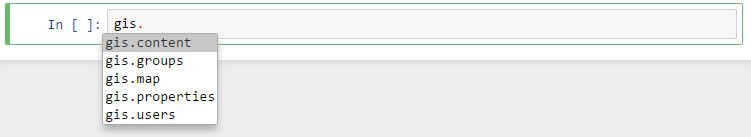</img>

## Helper objects
The `GIS` object provides helper objects to manage the GIS resources, i.e. the users, groups, content and datastores. These helper utilities are in the form of helper objects named: `users`, `groups`, `content` and `datastore` respectively. The helper utility for managing user roles named `roles` is available as a property on the helper object `users`.

Each such helper object has similar patterns of usage: there are methods to `get()`, `search()` and `create()` the respective resources.

The prescribed programming pattern is to not create the GIS resources (user, group, item, role, datastore) directly using their constructor, but to access them through their corresponding helper objects described above.

Thus, to access a user, you would use the `users` property of your `gis` object which gives you an instance of `UserManager` class. You would then call the `get()` method of the `UserManager` object and pass the user name of the user you are interested in.

In [5]:
user = gis.users.get('john.smith')

## Rich IDE experience with Jupyter notebooks
The ArcGIS API for Python is integrated with Jupyter Notebook to make it easy to visualize and interact with GIS resources. The `user` object has a rich representation that can be queried like this:

In [6]:
user

<User username:john.smith>

The resources are implemented as Python dictionaries. You can query for the resource properties using the <b><code>resource['property']</code></b> notation:

In [7]:
user['firstName']

'John'

The properties are also available as properties on the resource object, so you can use the dot notation to access them:

In [8]:
user.lastName

'Smith'

The resources provide methods to `update()`, `delete()` and use the object. The reminder of topics in this module talk in detail about using the various helper objects and resource objects.

### Embedded maps in Jupyter notebooks

The `GIS` object includes a map widget that can be used to visualize the content of your GIS as well as see the results of your analysis. Let's bring up a map of Palm Springs, CA:

In [13]:
map1 = gis.map("Palm Springs, CA")
map1

We can search for content in our GIS. Let's search for Hiking Trails in the Palm Springs region. We do that by calling **`gis.content.search()`** and for each web map or web layers that gets returned, we can display its rich representation within the notebook:

In [10]:
from IPython.display import display

items = gis.content.search('Palm Springs Trails', item_type='feature layer')
for item in items:
    display(item)

<Item title:"Original Plan Remaining from Basin and Range svc" type:Feature Layer Collection owner:geeknixta>

<Item title:"Loop7Victor_WFL" type:Feature Layer Collection owner:kgrahamACBCI>

<Item title:"Palm Springs Trails" type:Feature Layer Collection owner:paniello_geodesign>

<Item title:"PS Base Map_WFL1" type:Feature Layer Collection owner:KOAOCarcgis>

<Item title:"Loop2WestFork_WFL" type:Feature Layer Collection owner:kgrahamACBCI>

<Item title:"Andreas_WFL" type:Feature Layer Collection owner:kgrahamACBCI>

<Item title:"Palmer Lake Water" type:Feature Layer Collection owner:gmsesrigis>

<Item title:"Loop5EastFork_WFL" type:Feature Layer Collection owner:kgrahamACBCI>

<Item title:"Basin and Range north then end in AZ svc" type:Feature Layer Collection owner:geeknixta>

<Item title:"DryWashLoop_WFL" type:Feature Layer Collection owner:kgrahamACBCI>

We can then add the returned web layers to our map. To add the last layer returned above, we call the `add_layer()` method and pass in the layer for Palm Springs Trail:

In [11]:
# Let us filter out the item with title 'Trails' that we want to add
item_to_add = [temp_item for temp_item in items if 'Trail' in temp_item.title]
item_to_add

[<Item title:"Palm Springs Trails" type:Feature Layer Collection owner:paniello_geodesign>]

In [12]:
map1.add_layer(item_to_add[0])
map1.zoom_to_layer(item_to_add[0].layers[0])

The above cell updated the map widget, if you scroll to the top, you can notice a new trail layer being rendered on the map.